<a href="https://colab.research.google.com/github/NajwaMoursli/ML/blob/main/Projet_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Convertir fichier h5 en csv

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
from google.colab import files
uploaded = files.upload()

Saving SG24_dataset.h5 to SG24_dataset.h5


In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import cm
import collections


from sklearn.decomposition import PCA
import seaborn as sn
import random
import statistics

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Charger et identifier les données

In [3]:
filename = 'SG24_dataset.h5'
f = h5py.File(filename, 'r')

# List all groups
print("Keys: %s" % f.keys())
a_group_key = list(f.keys())[0]

# Get the data
data = list(f[a_group_key])
pd.DataFrame(data).to_csv("SG24_dataset.csv")


Keys: <KeysViewHDF5 ['Predictors', 'Target', 'User']>


In [4]:
sg=pd.read_csv("SG24_dataset.csv",delimiter=",")
print(sg)

    Unnamed: 0           0           1  ...        2397        2398        2399
0            0    0.000000    0.000000  ...   79.688438   79.544701   81.159004
1            1    0.000000    0.000000  ...  -11.858158  -12.103958   -7.099304
2            2    0.000000    0.000000  ...   29.157537   31.077909   26.780325
3            3    0.145442    0.195537  ...    0.675974    0.598320    0.667890
4            4    0.000000    0.000000  ...    0.008543   -0.014845    0.286645
5            5   -0.989367   -0.980696  ...    0.631599    0.685385    0.537282
6            6    0.000000    0.000000  ...   -0.379564   -0.414777   -0.427885
7            7   77.000000   20.000000  ...  130.000000  122.000000  130.000000
8            8   67.000000  131.000000  ...  142.000000  124.000000  138.000000
9            9   74.000000  127.000000  ...  155.000000  115.000000  148.000000
10          10   94.000000  144.000000  ...  123.000000  119.000000   72.000000
11          11  165.000000   63.000000  

In [66]:
X=np.array(f['Predictors']).T
Y=np.array(f['Target']).T.reshape(-1)
U=np.array(f['User']).T.reshape(-1)


print(U.shape)
print(Y.shape)
print(X.shape)

(2400,)
(2400,)
(2400, 29)


# Première Partie: Description et analyse de données



In [ ]:
#première analyse des données
	
col = []
nombre_lignes,colonne = sg.shape #donne le nombre de lignes et de colonnes 

#affiche les premières lignes d'un jeu de données 
print("Premières lignes du jeu de données : ")
print(sg.head())
		
print("Description des données :")
print(sg.describe(include="all"))

print("Enumération des colonnes : ")
print(sg.columns)



Premières lignes du jeu de données : 
   Unnamed: 0         0         1  ...       2397       2398       2399
0           0  0.000000  0.000000  ...  79.688438  79.544701  81.159004
1           1  0.000000  0.000000  ... -11.858158 -12.103958  -7.099304
2           2  0.000000  0.000000  ...  29.157537  31.077909  26.780325
3           3  0.145442  0.195537  ...   0.675974   0.598320   0.667890
4           4  0.000000  0.000000  ...   0.008543  -0.014845   0.286645

[5 rows x 2401 columns]
Description des données :
       Unnamed: 0           0           1  ...        2397        2398        2399
count   29.000000   29.000000   29.000000  ...   29.000000   29.000000   29.000000
mean    14.000000   70.660554   66.455684  ...   76.273254   85.116301   95.065654
std      8.514693   52.439249   47.320571  ...   53.510131   60.524772   60.257037
min      0.000000   -0.989367   -0.980696  ...  -11.858158  -12.103958   -7.099304
25%      7.000000    0.145442   20.000000  ...   44.000000   31.

#Visualisation dataset

In [67]:
df = pd.DataFrame(X)

df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,0.145442,0.0,-0.989367,0.0,77.0,67.0,74.0,94.0,165.0,82.0,68.0,79.0,138.0,72.0,97.0,106.0,132.0,77.0,91.0,96.0,0.0,83.0,33.0,136.0,140.0,143.0
1,0.0,0.0,0.0,0.195537,0.0,-0.980696,0.0,20.0,131.0,127.0,144.0,63.0,56.0,83.0,48.0,53.0,101.0,128.0,70.0,58.0,93.0,119.0,64.0,82.0,105.0,119.0,79.0,103.0,82.0
2,0.0,0.0,0.0,0.294340,0.0,-0.955701,0.0,22.0,139.0,134.0,125.0,76.0,68.0,81.0,56.0,61.0,96.0,141.0,75.0,59.0,87.0,130.0,68.0,86.0,106.0,131.0,75.0,105.0,89.0
3,0.0,0.0,0.0,0.352911,0.0,-0.935657,0.0,7.0,135.0,137.0,158.0,70.0,68.0,82.0,61.0,57.0,97.0,161.0,79.0,59.0,85.0,137.0,69.0,87.0,106.0,132.0,76.0,114.0,75.0
4,0.0,0.0,0.0,0.318924,0.0,-0.947780,0.0,123.0,164.0,69.0,56.0,82.0,52.0,57.0,96.0,124.0,70.0,60.0,83.0,124.0,64.0,80.0,105.0,120.0,67.0,115.0,80.0,0.0,83.0


In [ ]:
df.shape

#Description données

In [ ]:
# Colorize the graph based on likeability:
likeability_scores = np.array(Y)
 
data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

# Répartition du nb de répétitions du geste en fonction du geste considéré

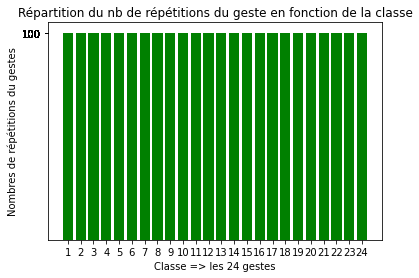

In [ ]:
targets,counts=np.unique(Y,return_counts=True)
plt.bar(targets,counts,color=['green'])
plt.xlabel('Classe => les 24 gestes')
plt.xticks(targets)
plt.yticks(counts)
plt.ylabel('Nombres de répétitions du gestes')
plt.title("Répartition du nb de répétitions du geste en fonction de la classe")
plt.show()

# Répartition du nb de répétitions du geste en fonction de l'utilisateur considéré

Text(0, 0.5, 'Nombres de répétitions de gestes')

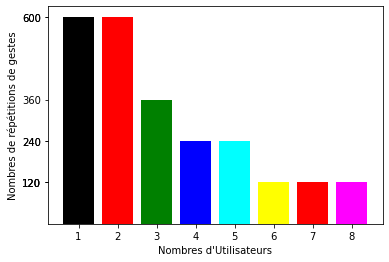

In [ ]:
user, counts = np.unique(U, return_counts=True)
plt.bar(user, counts,color=['black', 'red', 'green', 'blue', 'cyan','yellow','red','magenta'])
plt.xticks(user)
plt.yticks(counts)
plt.xlabel("Nombres d'Utilisateurs")
plt.ylabel("Nombres de répétitions de gestes")


On observe que le nombre de classe est équilibré concernant les gestes mais pas pour les utilisateurs qui sont un peu plus dispersés avec plus de gestes réalisés par les utilisateurs 1 et 2 que 6, 7 ou 8.

On nous précise dans l'énoncé qu'il y a plusieurs utilisateurs, avec plusieurs mesures ce qui peut poser problème par la suite. On souhaiterait observer les mesures relevées par nos capteurs pour un même geste par un même utilisateur et également par plusieurs utilisateurs différents dans le but de relever une tendance ou des régularités.

In [ ]:
#Utilisateur 1 geste 2,9,18
t2_u1 = np.where((T == 2) & (U == 1))[0]
t9_u1= np.where((T == 9) & (U == 1))[0]
t18_u1= np.where((T == 18) & (U == 1))[0]

#Utilisateur 4 geste 2,9,18
t2_u4 = np.where((T == 2) & (U == 4))[0]
t9_u4= np.where((T == 9) & (U == 4))[0]
t18_u4= np.where((T == 18) & (U == 4))[0]

#Utilisateur 8 geste 2,9,18
t2_u8 = np.where((T == 2) & (U == 8))[0]
t9_u8= np.where((T == 9) & (U == 8))[0]
t18_u8= np.where((T == 18) & (U == 8))[0]



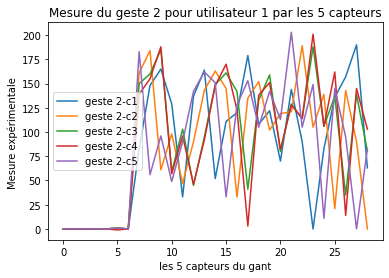

In [ ]:
for i in range(5):
    plt.plot(X[t2_u1[i]], label="geste 2-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 2 pour utilisateur 1 par les 5 capteurs')
plt.show()

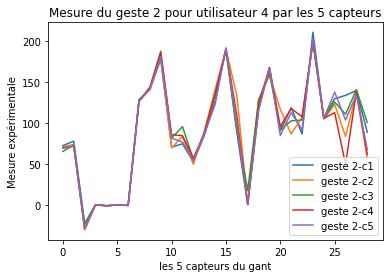

In [ ]:
for i in range(5):
    plt.plot(X[t2_u4[i]], label="geste 2-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale")
plt.title('Mesure du geste 2 pour utilisateur 4 par les 5 capteurs')
plt.show()

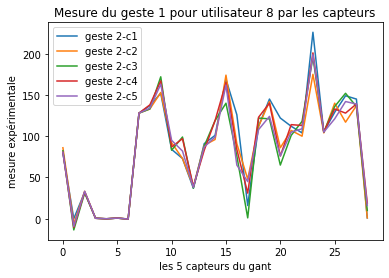

In [ ]:
for i in range(5):
    plt.plot(X[t2_u8[i]], label="geste 2-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("mesure expérimentale")
plt.title('Mesure du geste 2 pour utilisateur 8 par les capteurs')
plt.show()

Geste 9

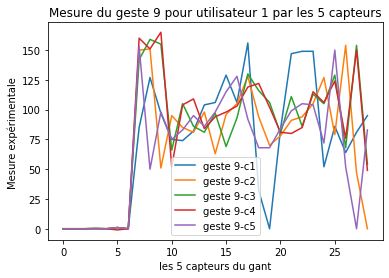

In [ ]:
for i in range(5):
    plt.plot(X[t9_u1[i]], label="geste 9-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 9 pour utilisateur 1 par les 5 capteurs')
plt.show()

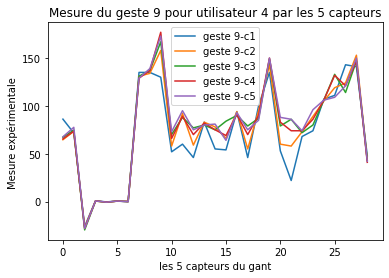

In [ ]:
for i in range(5):
    plt.plot(X[t9_u4[i]], label="geste 9-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 9 pour utilisateur 4 par les 5 capteurs')
plt.show()

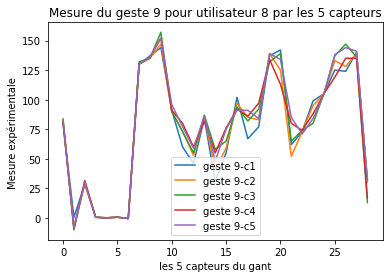

In [ ]:
for i in range(5):
    plt.plot(X[t9_u8[i]], label="geste 9-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 9 pour utilisateur 8 par les 5 capteurs')
plt.show()

############## Geste 18 #############

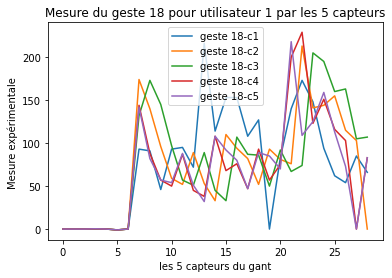

In [ ]:
for i in range(5):
    plt.plot(X[t18_u1[i]], label="geste 18-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 18 pour utilisateur 1 par les 5 capteurs')
plt.show()

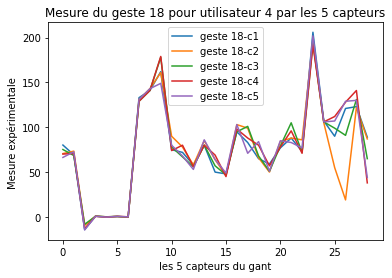

In [ ]:
for i in range(5):
    plt.plot(X[t18_u4[i]], label="geste 18-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 18 pour utilisateur 4 par les 5 capteurs')
plt.show()

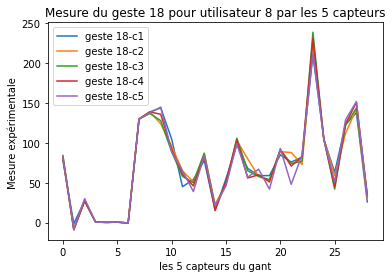

In [ ]:
for i in range(5):
    plt.plot(X[t18_u8[i]], label="geste 18-c"+str(i+1))
    plt.legend()

plt.xlabel("les 5 capteurs du gant")
plt.ylabel("Mesure expérimentale ")
plt.title('Mesure du geste 18 pour utilisateur 8 par les 5 capteurs')
plt.show()

Sur les gestes observés, pour l'instant sans faire attention aux valeurs relevées par nos capteurs on observe pour les utilisateurs 4 et 8 une certaine tendance pour le même geste effectué (2, 9 ou 18) alors que pour l'utilisateur 1, même en faisant le même geste on observe beaucoup de variabilités sur les valeurs observées ce qui pourrait s'expliquer par un nombre de répétitions plus grands donc une plus grandes précisions dans la reconnaissances des différents gestes.



# Répartition du nb de répétitions du geste en fonction de la classe et par utilisateur

In [ ]:
u=1
for i in range(4):
    for j in range(2):
        targets,counts=np.unique(Y[np.where(U==u)[0]],return_counts=True)
        u+=1
        print(targets,counts)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[ 1  2  3  4

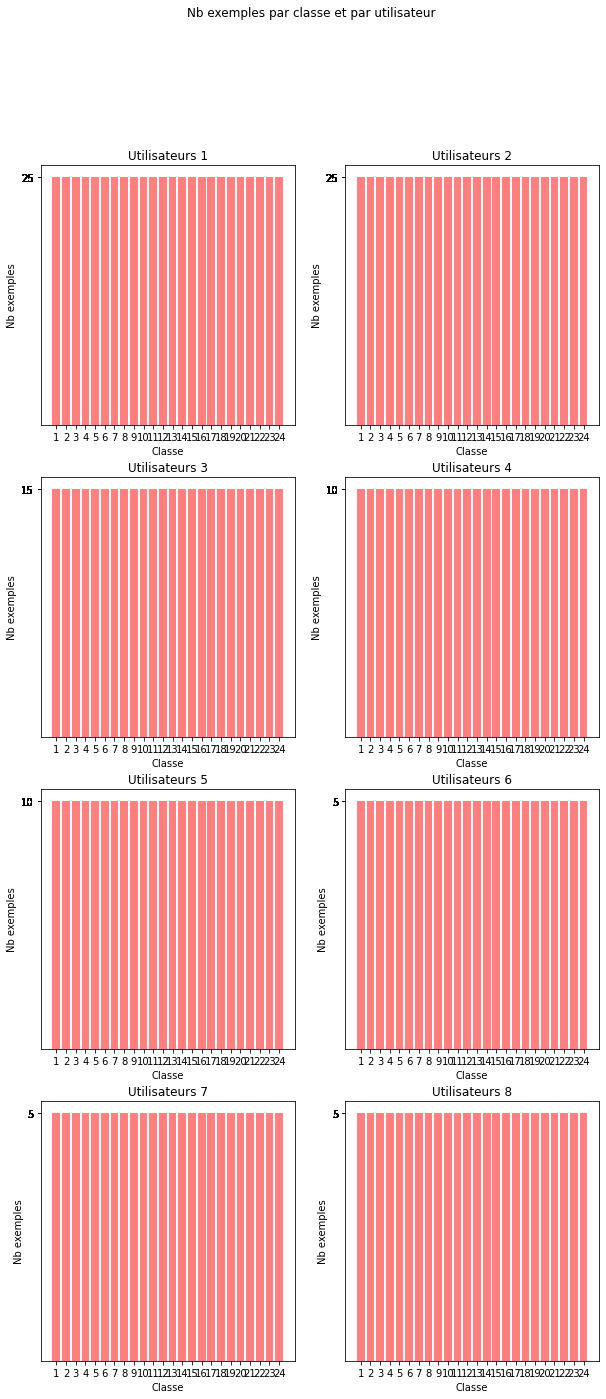

In [ ]:
fig,ax=plt.subplots(4,2,figsize=(10,22))
u=1
for i in range(4):
    for j in range(2):
        targets,counts=np.unique(Y[np.where(U==u)[0]],return_counts=True)
        ax[i,j].bar(targets,counts,color=color_map(likeability_scores))
        ax[i,j].set_title("Utilisateurs "+str(u))
        ax[i,j].set_xticks(targets)
        ax[i,j].set_xlabel("Classe (geste)")
        ax[i,j].set_ylabel("Nb répétitions du geste")
        ax[i,j].set_yticks(counts)
        u+=1
fig.suptitle("Nb répétition de geste par classe et par utilisateur")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X)
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

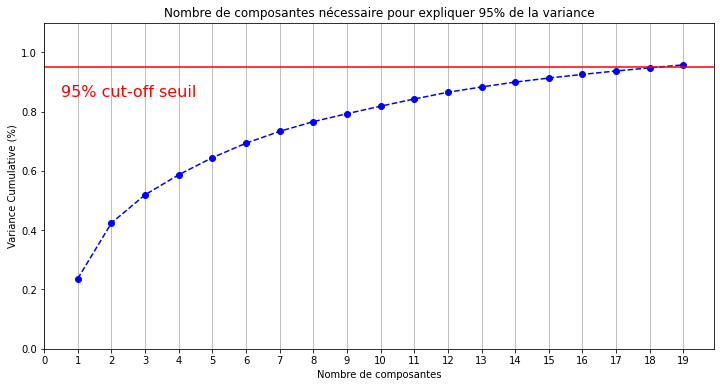

In [ ]:


% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,20, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Nombre de composantes')
plt.xticks(np.arange(0, 20, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Variance Cumulative (%)')
plt.title('Nombre de composantes nécessaire pour expliquer 95% de la variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off seuil', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
0,0.0,0.0,0.0,0.145442,0.0,-0.989367,0.0,77.0,67.0,74.0,94.0,165.0,82.0,68.0,79.0,138.0,72.0,97.0,106.0,132.0,77.0,91.0,96.0,0.0,83.0,33.0,136.0,140.0,143.0,-0.186258,-1.327235,2.577434,1.672039,-1.785618,0.316896,1.114723,3.280442,2.825233,0.711262,-1.136989,-1.765317,0.062596,-3.479345,-1.067341,0.991479,-1.540151,-0.968188,1.798020,0.153483,1.440582,0.636805,0.446510,0.073880,0.343584,0.326088,0.468668,0.973443,0.972676
1,0.0,0.0,0.0,0.195537,0.0,-0.980696,0.0,20.0,131.0,127.0,144.0,63.0,56.0,83.0,48.0,53.0,101.0,128.0,70.0,58.0,93.0,119.0,64.0,82.0,105.0,119.0,79.0,103.0,82.0,-1.860712,0.401552,3.293773,1.779846,-1.086337,2.265111,-0.529250,0.122599,-0.149690,0.626651,-0.534790,-0.731263,-0.433190,0.635164,-0.381578,2.035135,0.200055,0.242113,0.354471,-0.442070,0.241857,0.953542,-0.621035,0.299342,-0.128064,-0.441230,0.115451,-0.204111,0.306986
2,0.0,0.0,0.0,0.294340,0.0,-0.955701,0.0,22.0,139.0,134.0,125.0,76.0,68.0,81.0,56.0,61.0,96.0,141.0,75.0,59.0,87.0,130.0,68.0,86.0,106.0,131.0,75.0,105.0,89.0,-1.469625,0.499582,3.218522,1.540347,-0.866205,1.626965,-0.788398,0.248039,-0.277717,0.629282,-0.136154,-0.644525,-0.588413,0.757288,-0.421220,2.135312,0.104983,0.235105,0.036323,-0.350603,0.170385,0.610656,-1.062058,0.389064,-0.102897,-0.411842,-0.010660,-0.150953,0.286734
3,0.0,0.0,0.0,0.352911,0.0,-0.935657,0.0,7.0,135.0,137.0,158.0,70.0,68.0,82.0,61.0,57.0,97.0,161.0,79.0,59.0,85.0,137.0,69.0,87.0,106.0,132.0,76.0,114.0,75.0,-1.453593,-0.087142,3.628521,1.633272,-1.063913,1.639765,-0.914418,-0.024678,-0.515470,0.133869,-0.122628,-0.642144,-0.561924,0.851145,-0.513863,2.333463,0.444983,0.371219,0.201634,-0.272175,0.125778,0.473896,-0.549502,0.438048,0.044675,-0.617548,-0.184019,-0.350772,0.241146
4,0.0,0.0,0.0,0.318924,0.0,-0.947780,0.0,123.0,164.0,69.0,56.0,82.0,52.0,57.0,96.0,124.0,70.0,60.0,83.0,124.0,64.0,80.0,105.0,120.0,67.0,115.0,80.0,0.0,83.0,-0.502182,1.834244,0.513671,2.208387,-1.436171,2.831714,1.465886,5.055346,-0.097859,1.794722,0.650590,0.273766,0.601812,0.869806,0.554308,0.287540,-0.309193,0.102359,-2.011200,-0.888164,-1.796545,0.385215,-2.737843,0.786956,-1.058245,-0.166599,-0.074558,0.323077,-0.375800


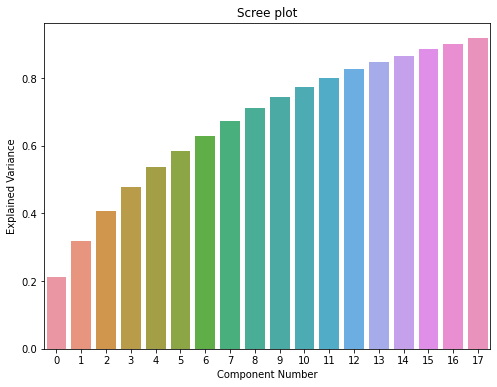

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


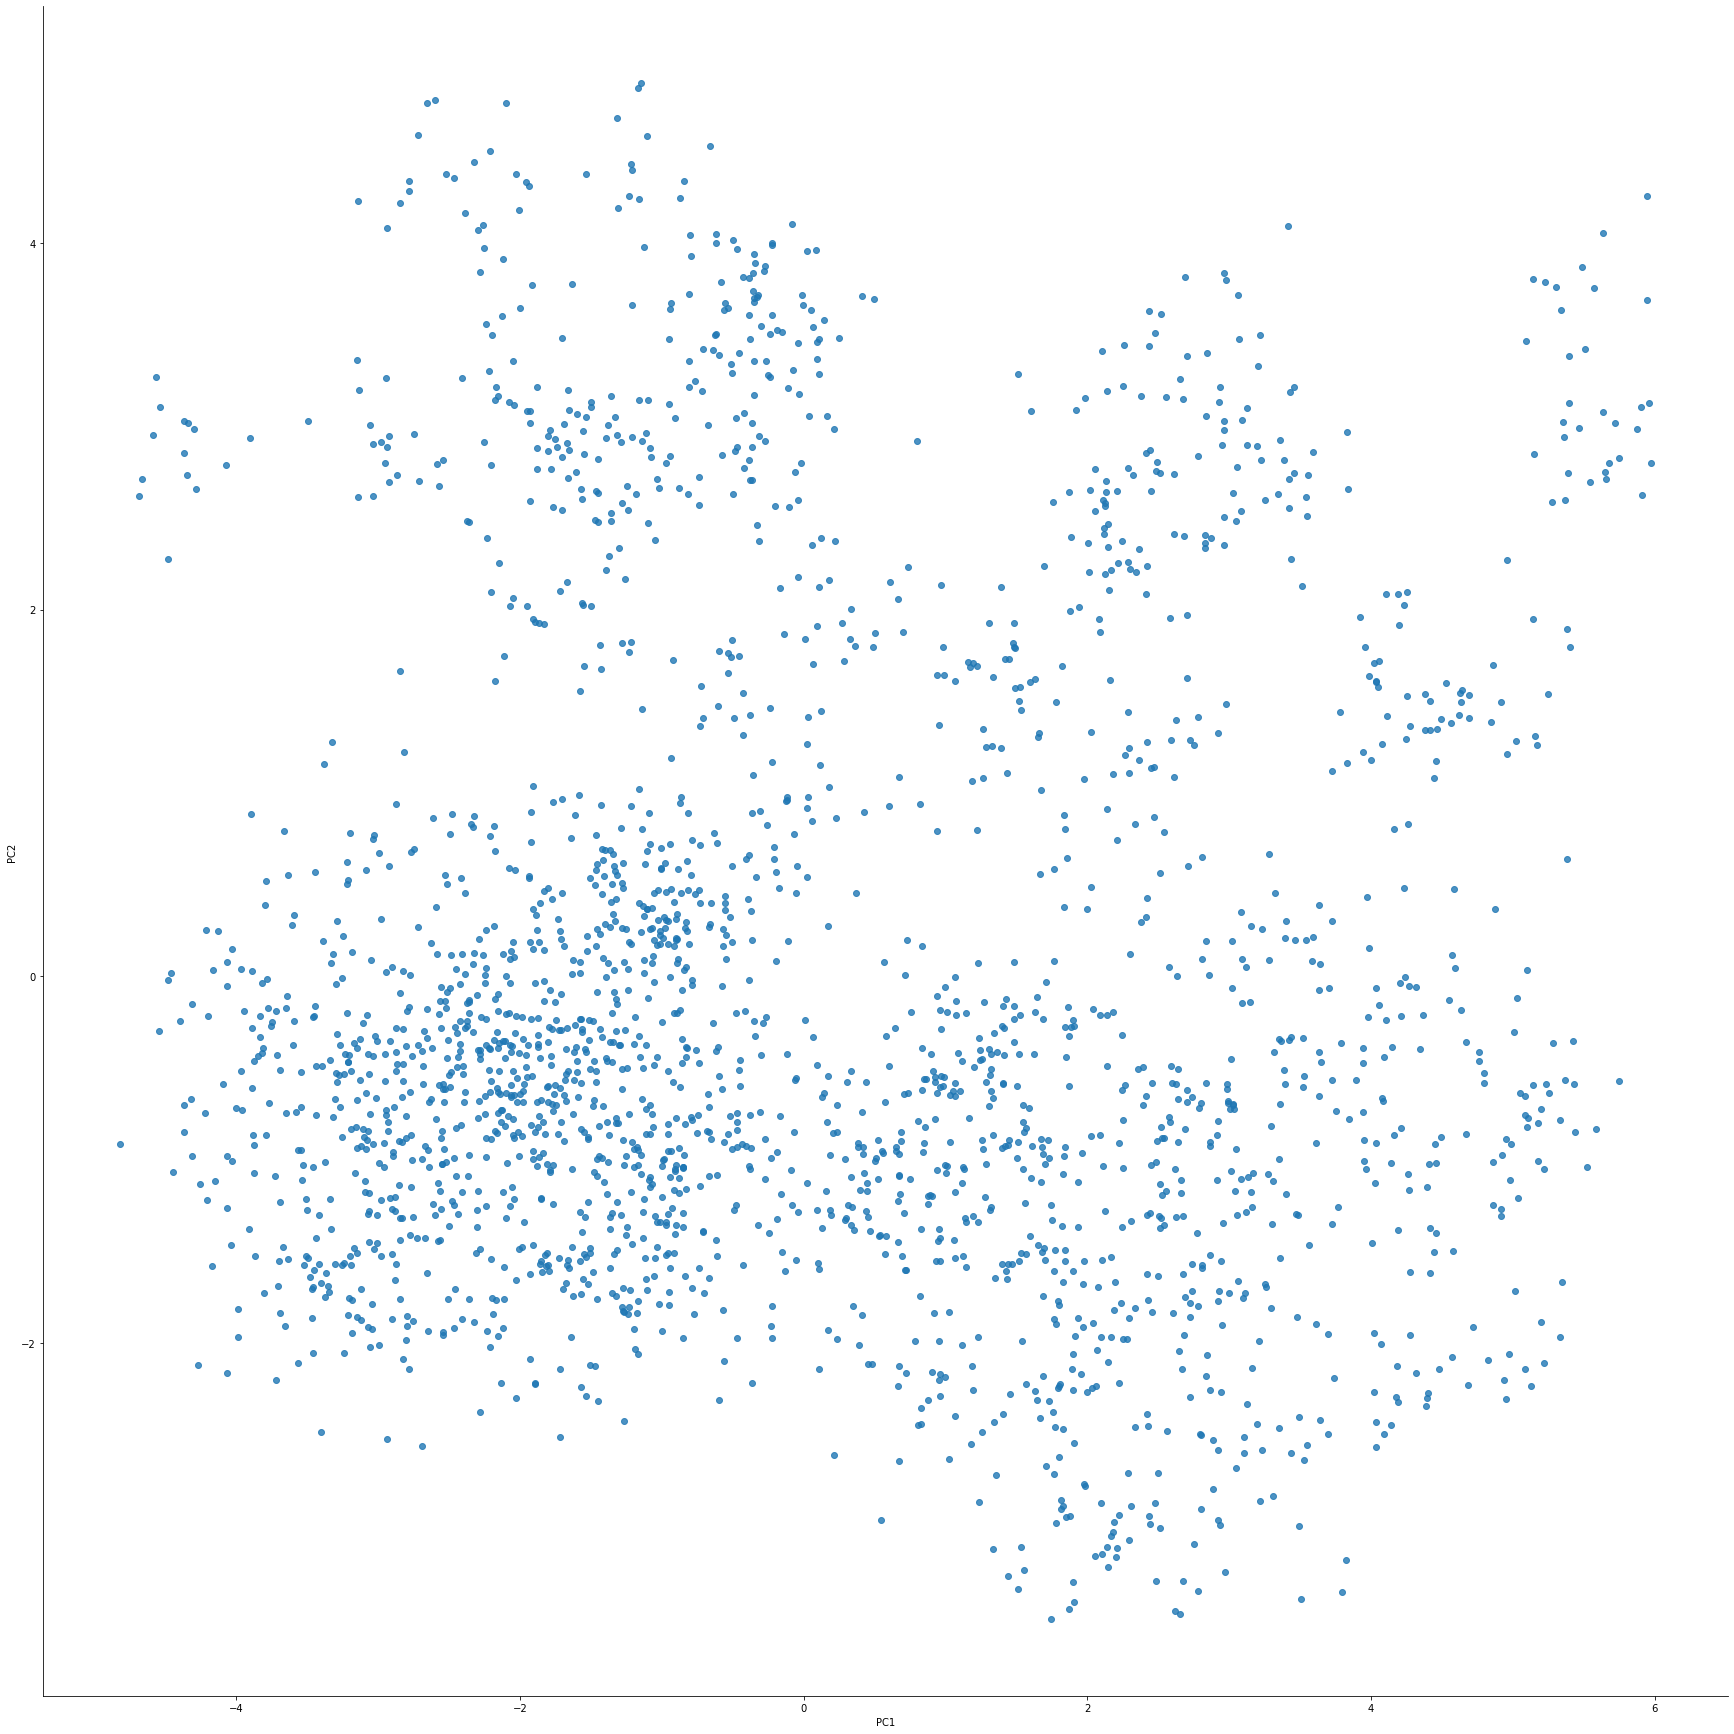

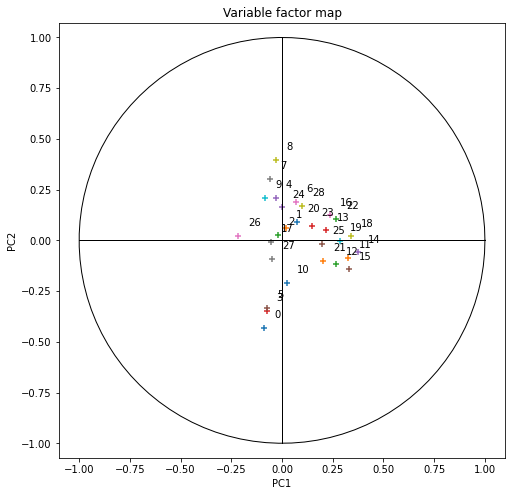

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale


 
n_components = 18
 
# Do the PCA.
Xp=scale(X)

pca = PCA(n_components=n_components).fit(Xp)

Xp= pca.transform(Xp)

# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    df['PC' + str(i + 1)] = Xp[:, i]

display(df.head())

# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.barplot(x=ind, y=pca.explained_variance_ratio_.cumsum())
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

# Show the points in terms of the first two PCs
g = sns.lmplot('PC1',
               'PC2',
               data=df,
               fit_reg=False,
               scatter=True,
               height=24)

plt.show()

# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.scatter(  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i], marker='+'  #1 for PC2
             )#head_width=0.6,
             #head_length=0.2 #0,0,

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color='black',linestyle='-',linewidth=1)# Add a unit circle for scale
#ajout axes 
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)  
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_title('Variable factor map')
plt.show()

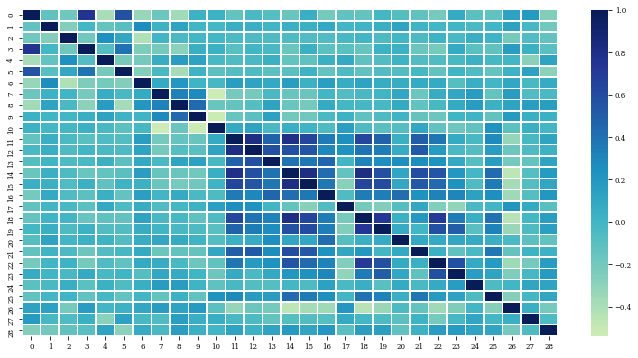

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

#df = pd.DataFrame(Y,columns=np.array(range(1,1)))
matx=np.corrcoef(X.T)
#corrMatrix = df.corr()
sn.heatmap(matx,center=0, annot=False,cmap="YlGnBu",linewidth=.5)
plt.show()

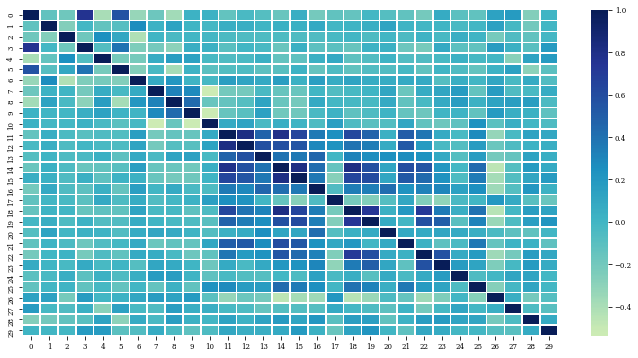

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

#df = pd.DataFrame(Y,columns=np.array(range(1,1)))

matx=np.corrcoef(X.T,y=Y.T)
#corrMatrix = df.corr()
sn.heatmap(matx,center=0, annot=False,cmap="YlGnBu",linewidth=.5)
plt.show()

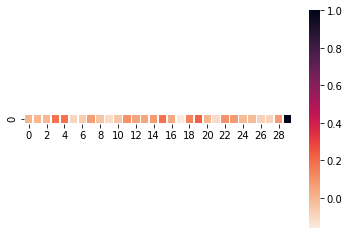

In [ ]:
color=sn.color_palette("rocket_r", as_cmap=True)
Y1=np.array(f['Target']).T
matx=np.corrcoef(np.hstack((X,Y1)).T)[-1].reshape(1,30)
#corrMatrix = df.corr()
sn.heatmap(np.where(matx,matx,0),cmap=color,square=True, annot=False,linewidth=.5,xticklabels=2,yticklabels=2)
plt.show()

In [ ]:
n=Xp.shape[0]
coord = pca.fit_transform(Xp)
eigval = pca.singular_values_**2/n

ctr = coord**2
for j in range(pca.n_components_):
  ctr[:,j] = ctr[:,j]/(n*eigval[j])
#print(pd.DataFrame({'id':range(n),'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

max_ctr = [0,0]
mean_ctr = [0,0]
for i in range(0,24):
  max_ctr[i] = max(ctr[:,i])
  mean_ctr[i] = np.mean(ctr[:,i])

print("Les contributions les plus importantes sont : ",max_ctr[0], max_ctr[1])
#print("Les moyennes des contributions sont : ",mean_ctr[0], mean_ctr[1])



Les contributions les plus importantes sont :  0.0024241896614891757 0.003195225596141122


In [ ]:
for i in range(0,29): 
    for j in range(0,2):
        if(ctr[i,j]==max_ctr[j]): 
            print("Axe numéro",j,"Arbre numéro :",i)

In [ ]:
print(pca.explained_variance_ratio_)

[0.21152773 0.10673993 0.08839125 0.0705781  0.059356   0.04810448
 0.04535608 0.04381342 0.03680441 0.03483261 0.02965338 0.02667881
 0.0239304  0.02095977 0.02027069 0.01813909 0.01723497 0.01590454
 0.01407313 0.01348868 0.01089746 0.01047323 0.00843784 0.00641697]


Done!
Done!


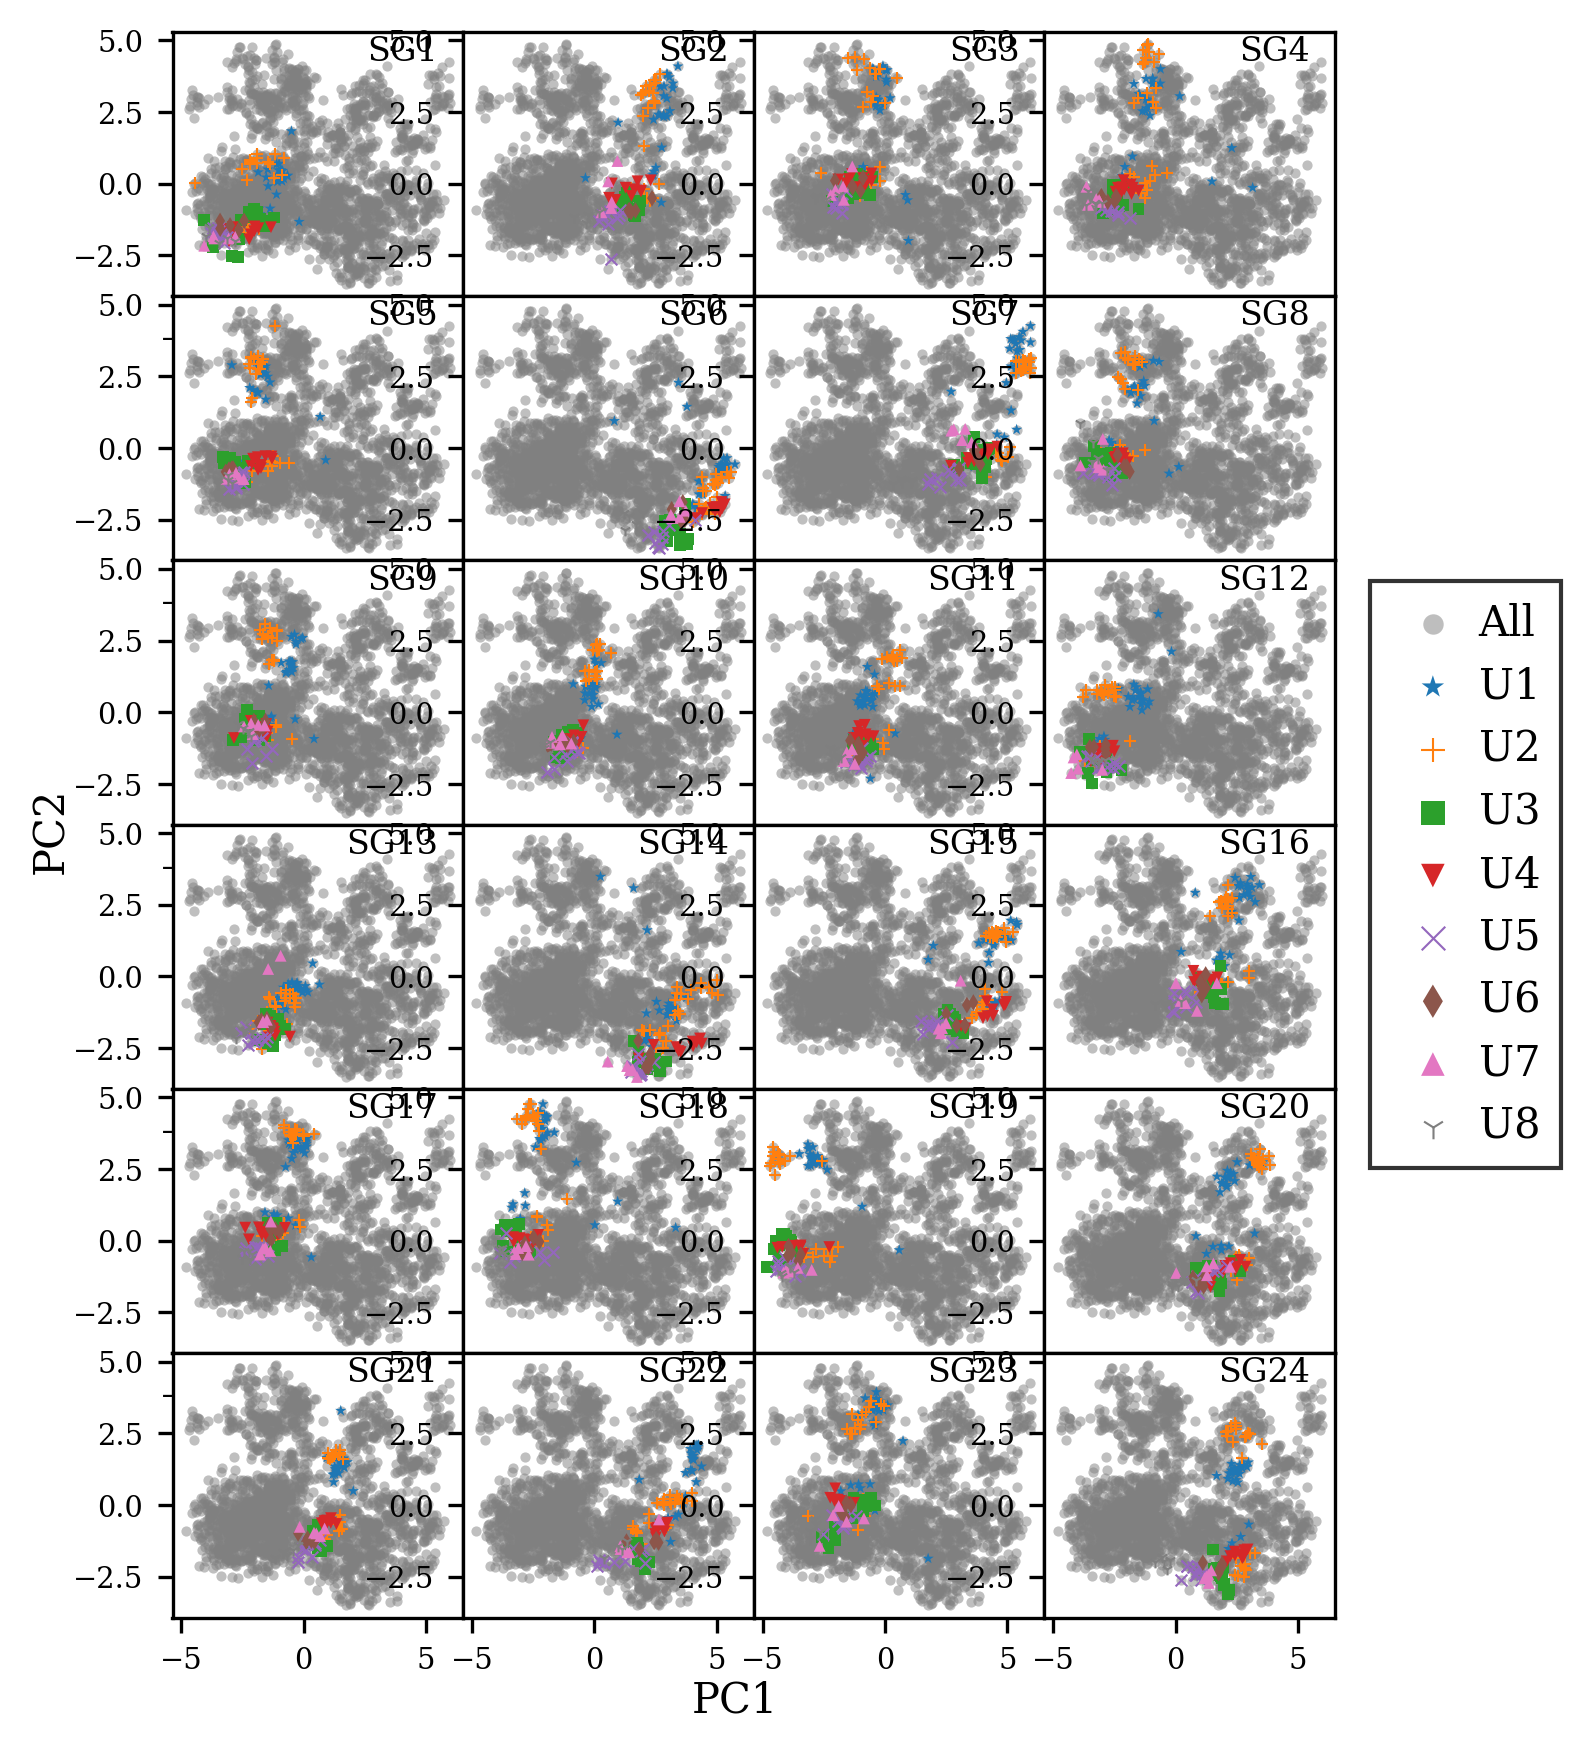

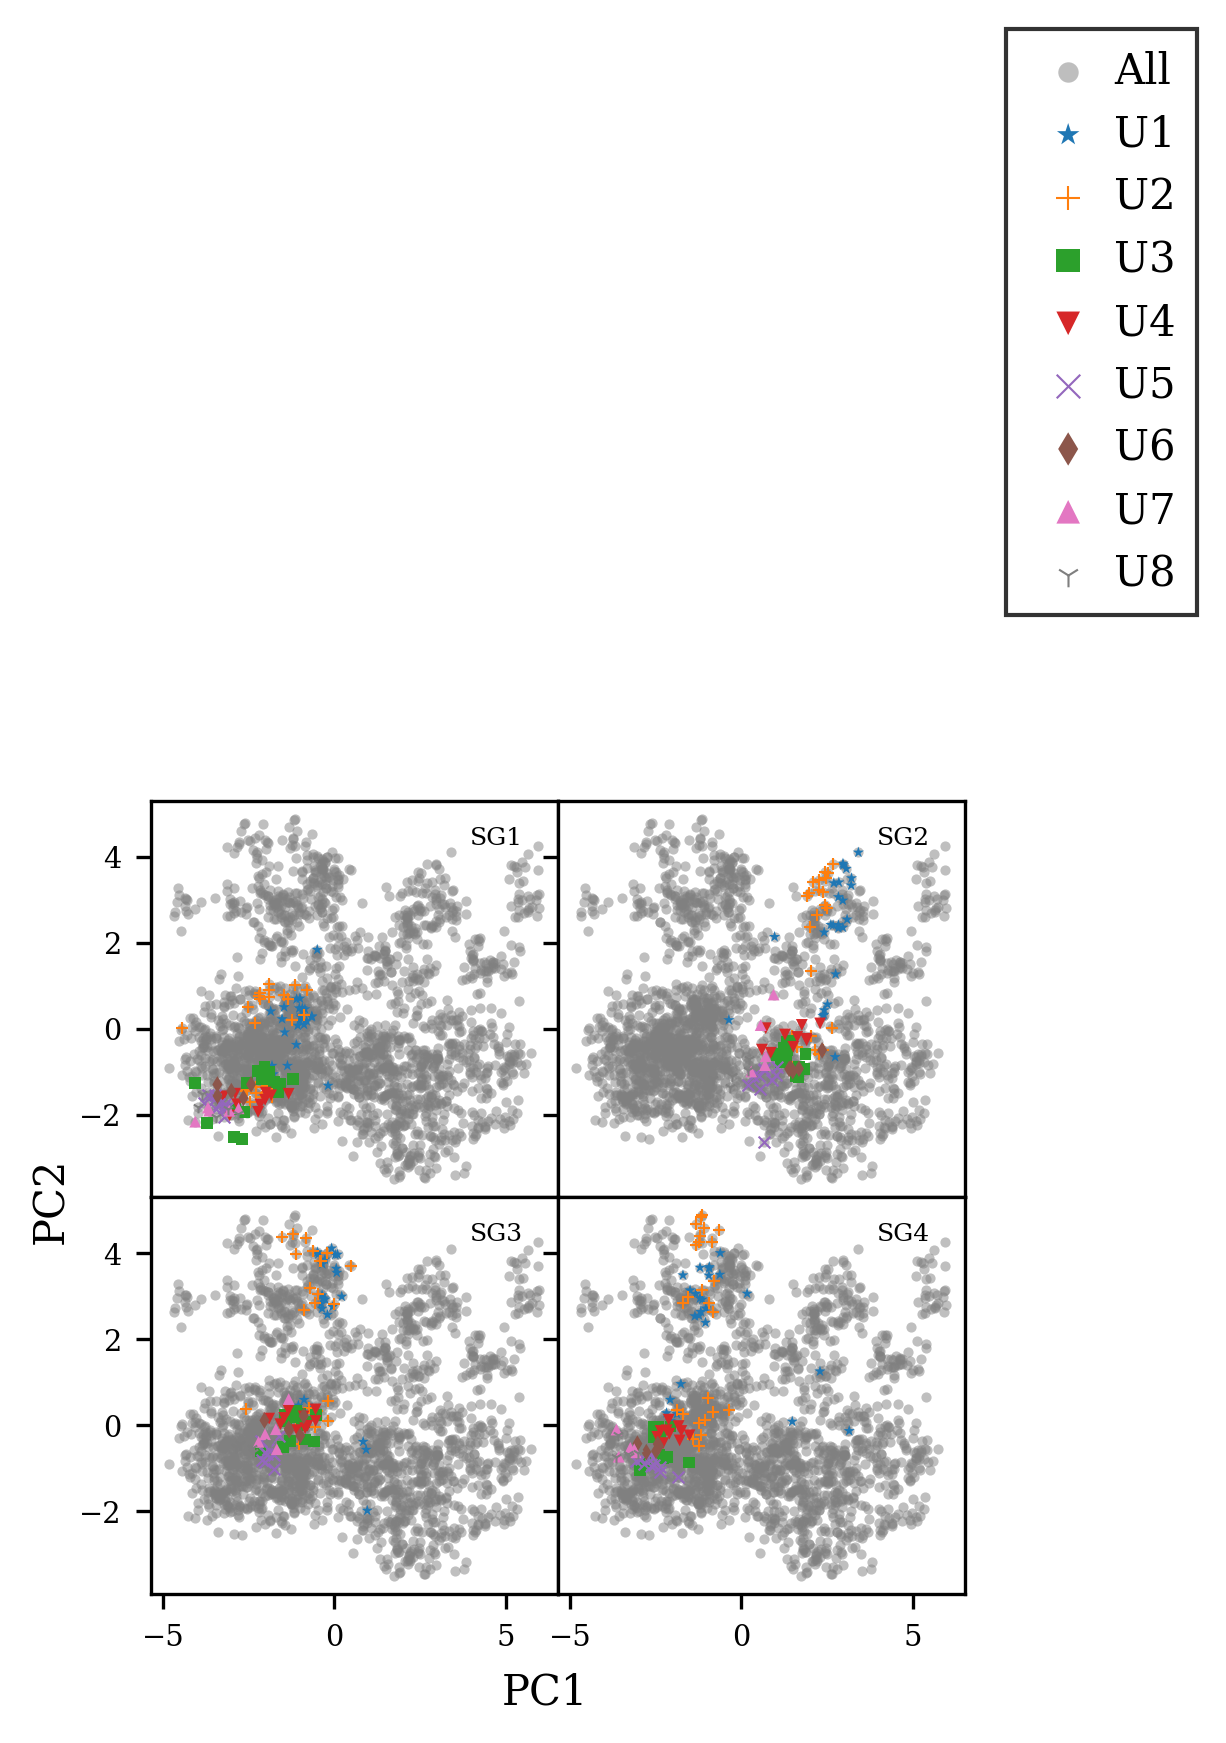

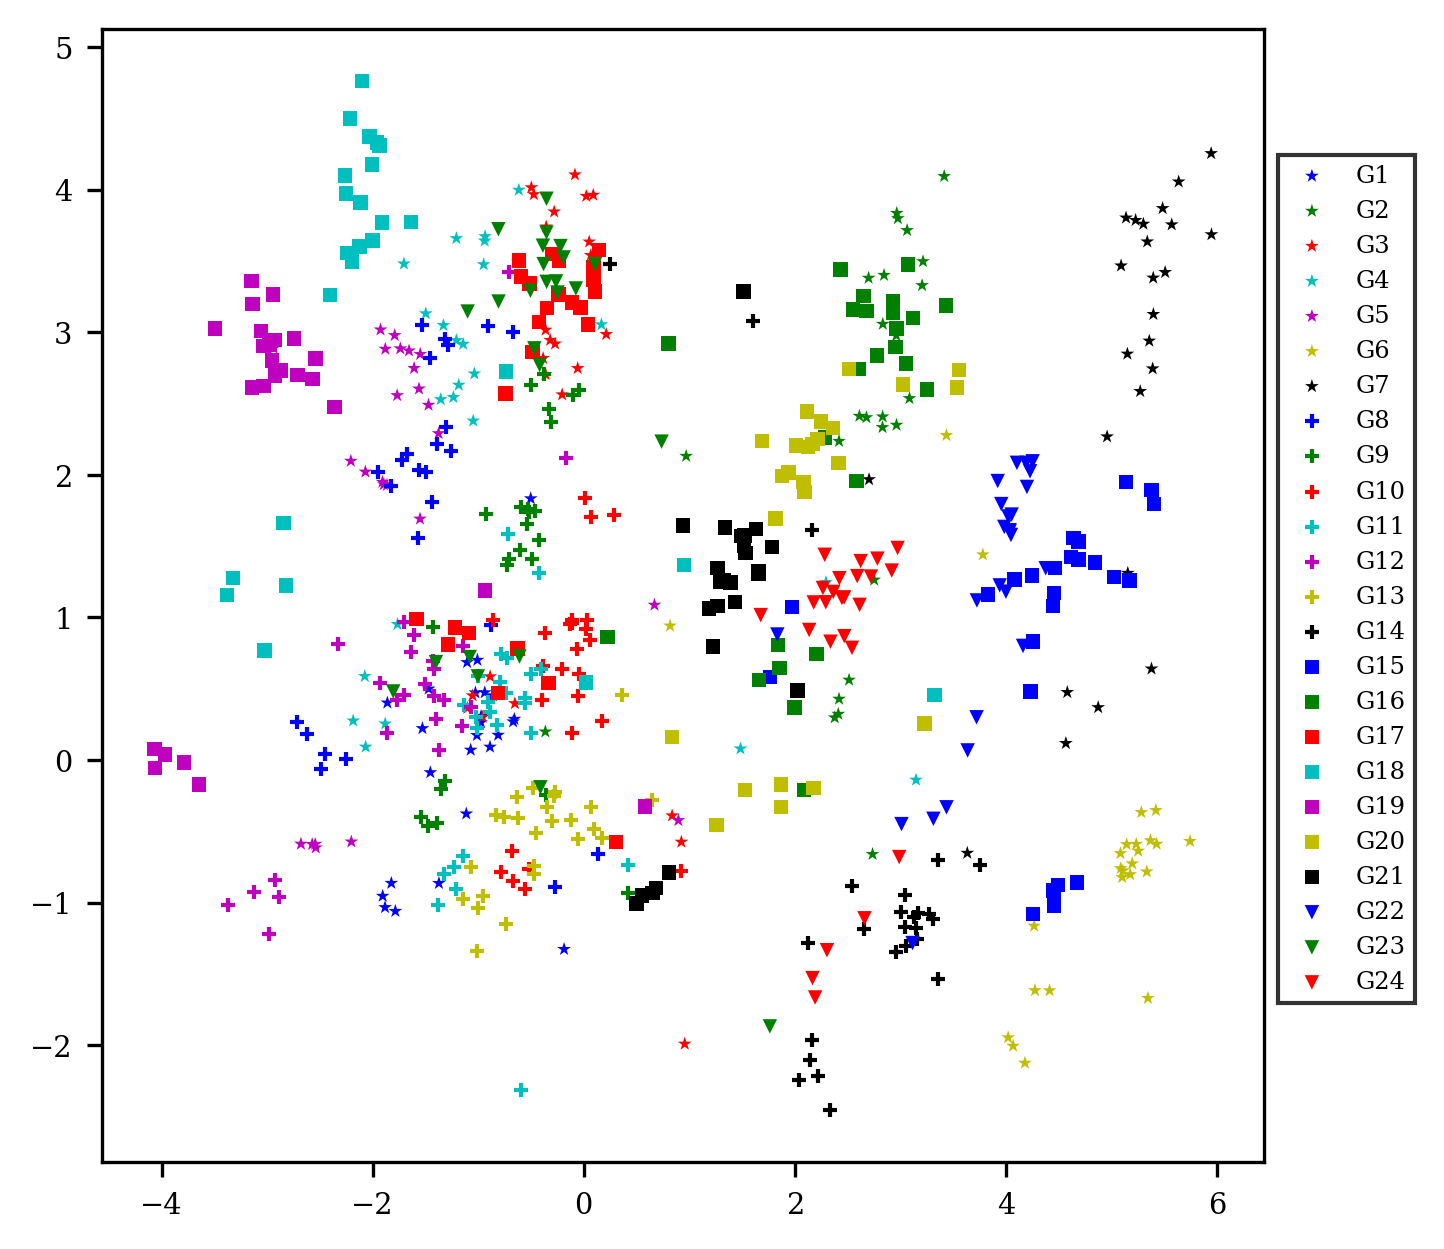

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

N = X.shape[0]
T=Y
# Limit number of users
usubset = np.unique(U)
uind = np.isin(U,usubset)
X,T , U = X[uind], T[uind], U[uind]

# Limit classes:
tsubset = np.unique(T)
tind = np.isin(T,tsubset)
X, T, U = X[tind], T[tind], U[tind]

Xp=scale(X)
acp=PCA(n_components=18).fit(Xp)
Xp=acp.transform(Xp)


# Classes in dataset:
class_list = np.unique(T)

# Default configurations
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rc('text', usetex=False)
plt.rc('legend', edgecolor=(0,0,0),fancybox=False)
plt.rc('lines', markeredgewidth=0.5,linewidth=0.5)


#%% PLOT DATA INTERUSER BY CLASS
marker_list = ('*','+','s','v','x','d','^','1')

f,axarr = plt.subplots(6,4, sharex=False, sharey=False, figsize=(5,7),dpi=300)#24 gestes
f.subplots_adjust(hspace=0.0,wspace=0)

for i in np.unique(T):
    indarr = np.unravel_index(i-1,(6,4))
    t = T==i
    
    # Scatter 1: not class
    axarr[indarr].scatter(Xp[:,0],Xp[:,1],
         s=6,
         facecolor='gray',
         alpha=0.5,
         linewidth=0,
         marker='o',
         label='All',
         zorder=0)# les colonnes 0 et 1 ne sont pas des classes
    # Title
    axarr[indarr].text(5.5,4.3,'SG%i' % i, ha='right', fontsize=8) 
    axarr[indarr].set_rasterization_zorder(1)
    
    for indmarker,j in enumerate(np.unique(U)):
        ji = np.logical_and(t,U==j)
        
        # Scatter 2: class
        axarr[indarr].scatter(Xp[ji,0], Xp[ji,1],
             s=8,
             edgecolor='none',
             marker=marker_list[indmarker],
             linewidth=0.5,
             label=('U%i' % j))# lee restes
        
        
lgd = axarr[indarr].legend(loc=2,
                    markerscale=2,
                    borderpad=0.5,
                    handletextpad=0.1,
                    bbox_to_anchor=(1.05,4.0))
ty = f.text(0.03, 0.5, 'PC2', va='center', rotation='vertical')
tx = f.text(0.5, 0.08, 'PC1', ha='center')
#f.savefig('pca_interuser.pdf',bbox_extra_artists=(lgd,ty,tx,), bbox_inches='tight')
#plt.close()
print('Done!')

#%% PLOT DATA INTERUSER BY CLASS [reduced] # les 8 premiers utiliusateurs
marker_list = ('*','+','s','v','x','d','^','1')

f,axarr = plt.subplots(2,2, sharex=True, sharey=True, figsize=(3.5,3.5),dpi=300)
f.subplots_adjust(hspace=0.0,wspace=0)

for i in np.unique(T)[:4]:
    indarr = np.unravel_index(i-1,(2,2))
    t = T==i
    
    # Scatter 1: not class
    
    axarr[indarr].scatter(Xp[:,0],Xp[:,1],
         s=6,
         facecolor='gray',
         alpha=0.5,
         linewidth=0,
         marker='o',
         label='All',
         zorder=0)
    
    # Title
    axarr[indarr].text(5.5,4.3,'SG%i' % i, ha='right', fontsize=6)
    axarr[indarr].set_rasterization_zorder(1)
    
    for indmarker,j in enumerate(np.unique(U)):
        ji = np.logical_and(t,U==j)
        
        # Scatter 2: class
        axarr[indarr].scatter(Xp[ji,0], Xp[ji,1],
             s=8,
             edgecolor='none',
             marker=marker_list[indmarker],
             linewidth=0.5,
             label=('U%i' % j))
        
        
lgd = axarr[indarr].legend(loc=2,
                    markerscale=2,
                    borderpad=0.5,
                    handletextpad=0.1,
                    bbox_to_anchor=(1.05,4.0))
ty = f.text(0.01, 0.5, 'PC2', va='center', rotation='vertical')
tx = f.text(0.5, 0.02, 'PC1', ha='center')
#f.savefig('pca_interuser9.pdf',bbox_extra_artists=(ty,tx,), bbox_inches='tight')
#plt.close()
print('Done!')

#%% PLOT DATA 

f = plt.figure(figsize=(5,5),dpi=300)

color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']


for ind,ti in enumerate(np.unique(T)):
    indarr = np.unravel_index(ind,(len(marker_list),len(color_list)))
    ji = np.logical_and(T==ti,U==1)
    
    plt.scatter(Xp[ji,0],Xp[ji,1],
                s=12,
                linewidth=1.0,
                edgecolors='none',
                facecolor=color_list[indarr[1]],
                marker=marker_list[indarr[0]],
                label=('G%i' % ti))
plt.legend(loc=1, fontsize = 'xx-small', bbox_to_anchor=(1.14,0.9))

#f.savefig('pca_allclasses_miguel5.png')
#plt.close()







In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[6.13686121 3.09674834 2.56441473 2.04761808 1.7220414  1.39561152
 1.31587455 1.27111885 1.06777283 1.0105667  0.86030644 0.77400796
 0.69427101 0.60808682 0.588095   0.52625295 0.50002236 0.46142399
 0.40829078 0.39133486 0.3161582  0.30385015 0.2447993  0.18616975]
[0.21152773 0.10673993 0.08839125 0.0705781  0.059356   0.04810448
 0.04535608 0.04381342 0.03680441 0.03483261 0.02965338 0.02667881
 0.0239304  0.02095977 0.02027069 0.01813909 0.01723497 0.01590454
 0.01407313 0.01348868 0.01089746 0.01047323 0.00843784 0.00641697]
[0.21152773 0.31826766 0.40665891 0.47723701 0.53659301 0.58469749
 0.63005357 0.67386699 0.7106714  0.74550401 0.77515739 0.8018362
 0.8257666  0.84672638 0.86699706 0.88513616 0.90237112 0.91827566
 0.93234879 0.94583747 0.95673494 0.96720816 0.975646   0.98206297]


In [ ]:
!pip install plotly
import plotly.express as px

In [ ]:
df.describe()

#2eme partie : Protocol expérimental
Objectifs :

* "base line" => pas optimisé, variable intéressante
* score, modèle simple (knn, randomforest,svm) en respectant le protocole expérimental.
* feature engineering
* comparaison modèle
* optimisation hyperparamètre
* nouvelles contributions

In [97]:
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneGroupOut, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, log_loss, confusion_matrix, classification_report, precision_score, recall_score

In [70]:
dummy = DummyClassifier(strategy="uniform", random_state=42, constant=24)
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC(decision_function_shape='ovo', probability=True)
mlp = MLPClassifier()


In [71]:
n_split = 5
sss = StratifiedShuffleSplit(n_splits=n_split, test_size=0.3, random_state=42)

# Division du jeu de données (TRAIN + VALIDATION + TEST)


# Création des différents datasets à tester


2- Séparations par capteurs
* X en considérant tous les capteurs
* X en considérant tous les capteurs (scaled)
* X en considérant les 23 premiers => 80% datset
* X_new => penalité l1 modèle lin


# Analyse des Features

In [68]:
X = df.to_numpy()
y = Y
# Plusieurs dataset à tester
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)
X_23captors = X[:,6:] #22


In [88]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(2400, 26)

# Base Line

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,log_loss,roc_auc_score

In [72]:
good_pred = 0
for row in range(X.shape[0]) :
  r = random.randint(1,24)
  if y[row] == r :
    good_pred += 1
print("Score accuracy", good_pred / X.shape[0])
print(np.unique(y))


Score accuracy 0.04541666666666667
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [73]:
acc_cv = cross_val_score(dummy, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=>",acc_cv.mean())


Accuracy Score (KFold=5) => [0.04305556 0.05277778 0.04027778 0.03055556 0.04444444] => 0.042222222222222223


# Dummy Classifier

In [13]:
strategies = ["stratified","most_frequent","prior","uniform","constant"]
for strat in strategies:
  dummy_clf = DummyClassifier(strategy=strat, random_state=0, constant=2)
  dummy_clf.fit(X, y)
  print(dummy_clf.predict(X))
  print("Stratégie {}: {}".format(strat, dummy_clf.score(X, y)))

[ 9 12  7 ... 14  1 20]
Stratégie stratified: 0.04083333333333333
[1 1 1 ... 1 1 1]
Stratégie most_frequent: 0.041666666666666664
[1 1 1 ... 1 1 1]
Stratégie prior: 0.041666666666666664
[13 16 22 ...  5  5 14]
Stratégie uniform: 0.04541666666666667
[2 2 2 ... 2 2 2]
Stratégie constant: 0.041666666666666664


In [84]:
accuracy_dummy_cv = []
strategies = ["stratified","most_frequent","prior","uniform","constant"]

for strat in strategies :
  tmp = 0.0
  for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dummy_clf = DummyClassifier(strategy=strat, random_state=0, constant=1)
    dummy_clf.fit(X_train, y_train)

    tmp += dummy_clf.score(X_test, y_test)

  print(strat,":", tmp/n_split)

stratified : 0.04222222222222223
most_frequent : 0.041666666666666664
prior : 0.041666666666666664
uniform : 0.04083333333333333
constant : 0.041666666666666664


In [90]:
accuracy_dummy_cv = []
strategies = ["stratified","most_frequent","prior","uniform","constant"]

for strat in strategies :
  tmp = 0.0
  for train_index, test_index in sss.split(X_new, y):
    X_new_train, X_new_test = X_new[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dummy_clf = DummyClassifier(strategy=strat, random_state=0, constant=1)
    dummy_clf.fit(X_new_train, y_train)

    tmp += dummy_clf.score(X_new_test, y_test)

  print(strat,":", tmp/n_split)

stratified : 0.04222222222222223
most_frequent : 0.041666666666666664
prior : 0.041666666666666664
uniform : 0.04083333333333333
constant : 0.041666666666666664


In [85]:
accuracy_dummy_cv = []
strategies = ["stratified","most_frequent","prior","uniform","constant"]

for strat in strategies :
  tmp = 0.0
  for train_index, test_index in sss.split(X_scale, y):
    X_scale_train, X_scale_test = X_scale[train_index], X_scale[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dummy_clf = DummyClassifier(strategy=strat, random_state=0, constant=1)
    dummy_clf.fit(X_scale_train, y_train)

    tmp += dummy_clf.score(X_scale_test, y_test)

  print(strat,":", tmp/n_split)

stratified : 0.04222222222222223
most_frequent : 0.041666666666666664
prior : 0.041666666666666664
uniform : 0.04083333333333333
constant : 0.041666666666666664


In [86]:
accuracy_dummy_cv = []
strategies = ["stratified","most_frequent","prior","uniform","constant"]

for strat in strategies :
  tmp = 0.0
  for train_index, test_index in sss.split(X, y):
    X_23_train, X_23_test = X_23captors[train_index], X_23captors[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dummy_clf = DummyClassifier(strategy=strat, random_state=0, constant=1)
    dummy_clf.fit(X_23_train, y_train)

    tmp += dummy_clf.score(X_23_test, y_test)

  print(strat,":", tmp/n_split)

stratified : 0.04222222222222223
most_frequent : 0.041666666666666664
prior : 0.041666666666666664
uniform : 0.04083333333333333
constant : 0.041666666666666664


# Modèle KNN

In [ ]:
acc_cv = cross_val_score(knn, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(knn, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(knn, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Accuracy Score (KFold=5) => [0.9125     0.92361111 0.93194444 0.925      0.92361111] => 0.923
Accuracy Score (KFold=5) => [0.89722222 0.9        0.91388889 0.92083333 0.89305556] => 0.905
Accuracy Score (KFold=5) => [0.91666667 0.91805556 0.92638889 0.9125     0.91111111] => 0.917


Recherche des meilleurs hyper-parammètres + crossval : GridSearchCV

In [91]:
param_grid_knn = {
    'n_neighbors' : [2,10,20,30],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidian', 'manhattan', 'minkowski'],
    
}
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, verbose=1, n_jobs=-1, cv= sss)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.3s finished


{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Accuracy Score (KFold=5) => [0.92916667 0.9375     0.94861111 0.9375     0.94583333] => 0.940
Matrice de confusion
 [[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  

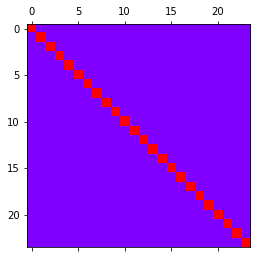

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.7s finished


{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
Accuracy Score (KFold=5) => [0.94246032 0.91468254 0.94047619 0.91468254 0.93055556] => 0.929
1.0
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
Accuracy Score (KFold=5) => [0.9265873  0.92857143 0.92857143 0.90873016 0.92857143] => 0.924
1.0


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.5s finished


In [100]:
CV_knn.fit(X, y)
print(CV_knn.best_params_)
acc_cv = cross_val_score(CV_knn.best_estimator_, X, y, cv=sss)
y_pred=CV_knn.predict(X_test)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
conf = confusion_matrix(y_test, y_pred)
print("Matrice de confusion\n",conf)
#pour visualiser les valeurs bien représentées et celles qui ne le sont pas 
plt.matshow(conf, cmap='rainbow');
plt.show()


CV_knn.fit(X_scale, y)
print(CV_knn.best_params_)
y_pred=CV_knn.predict(X_scale_test)
acc_cv = cross_val_score(CV_knn.best_estimator_, X_scale_train, y_train, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
print(f1_score(y_test,y_pred,average="macro").mean())

CV_knn.fit(X_23captors, y)
print(CV_knn.best_params_)
y_pred=CV_knn.predict(X_23_test)
acc_cv = cross_val_score(CV_knn.best_estimator_, X_23_train, y_train, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
print(f1_score(y_test,y_pred,average="macro").mean())

#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

In [ ]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}
0.9324999999999999


In [ ]:
CV_knn.fit(X, y)
print(CV_knn.best_params_)
acc_cv = cross_val_score(CV_knn.best_estimator_, X, y, cv=sss)
f1_macro=f1_score(y_test,CV_knn.best_estimator_.predict(X_test),average='macro')
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
print("F1_macro =>",f1_macro,"=> %.3f"%f1_macro.mean())

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.1s finished


{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Accuracy Score (KFold=5) => [0.92916667 0.9375     0.94861111 0.9375     0.94583333] => 0.940
F1_macro => 1.0 => 1.000


Modèle Random Forest

In [ ]:
acc_cv = cross_val_score(random_forest, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.4f"%acc_cv.mean())

acc_cv = cross_val_score(random_forest, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.4f"%acc_cv.mean())

acc_cv = cross_val_score(random_forest, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.4f"%acc_cv.mean())

Accuracy Score (KFold=5) => [0.94166667 0.95416667 0.96111111 0.95972222 0.96527778] => 0.9564
Accuracy Score (KFold=5) => [0.94027778 0.95416667 0.96111111 0.95972222 0.96527778] => 0.9561
Accuracy Score (KFold=5) => [0.93888889 0.94305556 0.95138889 0.95277778 0.95138889] => 0.9475


In [95]:
from sklearn.model_selection import RandomizedSearchCV

# Nombres de features à considérer à chaque split 
max_features = ['auto', 'sqrt', "log2"]
# NB arbre dans random forest 
n_estimators = [20, 70, 400, 1500, 2400]
# NB Maximum du nombres de niveau des arbres 
max_depth = [5, 8, 15, 25, 30, None]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 7, 15] 

random_grid = {'max_features': max_features,
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 100, cv = sss, verbose=1, random_state=42, n_jobs = -1)

In [104]:
rf_random.fit(X_new, y)
print(rf_random.best_params_)
acc_cv = cross_val_score(rf_random.best_estimator_, X_new, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

rf_random.fit(X, y)
print(rf_random.best_params_)
acc_cv = cross_val_score(rf_random.best_estimator_, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
y_pred = rf_random.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
print("Matrice de confusion\n",conf)
#pour visualiser les valeurs bien représentées et celles qui ne le sont pas 
plt.matshow(conf, cmap='rainbow');
plt.show()


rf_random.fit(X_scale, y)
print(rf_random.best_params_)
acc_cv = cross_val_score(rf_random.best_estimator_, X_scale, y, cv=sss)
f1_macro=f1_score(y_test,rf_random.best_estimator_.predict(X_test),average='macro')
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())




Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min


KeyboardInterrupt: ignored

In [ ]:
rf_random.fit(X_scale, y)
print(rf_random.best_params_)
acc_cv = cross_val_score(rf_random.best_estimator_, X_scale, y, cv=sss)
f1_macro=f1_score(y_test,rf_random.best_estimator_.predict(X_test),average='macro')
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
print("F1_macro =>",f1_macro,"=> %.3f"%acc_cv.mean())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.3min


KeyboardInterrupt: ignored

# Modèle SVM

In [ ]:
acc_cv = cross_val_score(svm, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(svm, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(svm, X_new, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Accuracy Score (KFold=5) => [0.91527778 0.93194444 0.93611111 0.93472222 0.92638889] => 0.929
Accuracy Score (KFold=5) => [0.93888889 0.95833333 0.95694444 0.95555556 0.95277778] => 0.953
Accuracy Score (KFold=5) => [0.92083333 0.92222222 0.93888889 0.93055556 0.92361111] => 0.927


In [59]:
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear', 'poly', 'sigmoid'],
              'max_iter': [5000]}  
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, verbose=1, n_jobs=-1, cv= sss)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.2min finished


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': 5000}
1.0
Matrice de confusion
 [[30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  

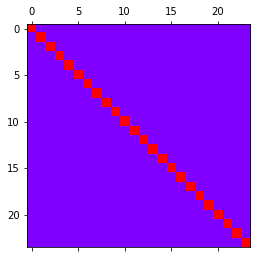

'\nCV_svm.fit(X_scale, y)\nprint(CV_svm.best_params_)\nacc_cv = cross_val_score(CV_svm.best_estimator_, X_scale, y, cv=sss)\nprint("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())\n\n\nCV_svm.fit(X_23captors, y)\nprint(CV_svm.best_params_)\nacc_cv = cross_val_score(CV_svm.best_estimator_, X_23captors, y, cv=sss)\nprint("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())\n'

In [102]:
"""
CV_svm.fit(X, y)
print(CV_svm.best_params_)
#acc_cv = cross_val_score(CV_svm.best_estimator_, Xtrain, y_train, cv=sss)
#print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
y_proba=CV_svm.predict_proba(Xtest)
y_pred = CV_svm.predict(X_test)
print(accuracy_score(y_test, y_pred).mean())
conf = confusion_matrix(y_test, y_pred)
print("Matrice de confusion\n",conf)
#pour visualiser les valeurs bien représentées et celles qui ne le sont pas 
plt.matshow(conf, cmap='rainbow');
plt.show()
"""

CV_svm.fit(X_scale, y)
print(CV_svm.best_params_)
acc_cv = cross_val_score(CV_svm.best_estimator_, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
y_pred = CV_svm.predict(X_test)
print(accuracy_score(y_test, y_pred).mean())
conf = confusion_matrix(y_test, y_pred)
print("Matrice de confusion\n",conf)
#pour visualiser les valeurs bien représentées et celles qui ne le sont pas 
plt.matshow(conf, cmap='rainbow');
plt.show()

"""
CV_svm.fit(X_23captors, y)
print(CV_svm.best_params_)
acc_cv = cross_val_score(CV_svm.best_estimator_, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
"""

# Decision tree

In [ ]:
acc_cv = cross_val_score(decision_tree, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(decision_tree, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(decision_tree, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Accuracy Score (KFold=5) => [0.87638889 0.90972222 0.90833333 0.88055556 0.89444444] => 0.894
Accuracy Score (KFold=5) => [0.89444444 0.91666667 0.91805556 0.88333333 0.90138889] => 0.903
Accuracy Score (KFold=5) => [0.88888889 0.91111111 0.91111111 0.88611111 0.91111111] => 0.902


In [ ]:
# Nombres de features à considérer à chaque split 
max_features = ['auto', 'sqrt', "log2"]
# NB Maximum du nombres de niveau des arbres 
max_depth = [5, 8, 15, 25, 30, None]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4, 7, 15] 

param_grid_decision_tree = {  
              'criterion': ['gini','entropy'], 
              'splitter':['best','random'],
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}  
CV_decision_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_decision_tree, verbose=1, n_jobs=-1, cv= sss)

In [ ]:
CV_decision_tree.fit(X_new, y)
print(CV_decision_tree.best_params_)
acc_cv = cross_val_score(CV_decision_tree.best_estimator_, X, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

CV_decision_tree.fit(X_scale, y)
print(CV_decision_tree.best_params_)
acc_cv = cross_val_score(CV_decision_tree.best_estimator_, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())


CV_decision_tree.fit(X_23captors, y)
print(CV_decision_tree.best_params_)
acc_cv = cross_val_score(CV_decision_tree.best_estimator_, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:   27.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy Score (KFold=5) => [0.84305556 0.82083333 0.82777778 0.82222222 0.81666667] => 0.826
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:   31.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy Score (KFold=5) => [0.80277778 0.79166667 0.82222222 0.8375     0.81666667] => 0.814
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    3.9s


{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy Score (KFold=5) => [0.77916667 0.78472222 0.85277778 0.83194444 0.82361111] => 0.814


[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:   23.9s finished


In [ ]:
CV_decision_tree.fit(X, y)
print(CV_decision_tree.best_params_)
acc_cv = cross_val_score(CV_decision_tree.best_estimator_, X, y, cv=sss)
f1_macro=f1_score(y_test,CV_decision_tree.best_estimator_.predict(X_test),average='macro')
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
print("F1_macro =>",f1_macro,"=> %.3f"%f1_macro.mean())

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   22.4s


{'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy Score (KFold=5) => [0.82916667 0.85694444 0.82638889 0.84305556 0.81805556] => 0.835
F1_macro => 0.9668475997590654 => 0.967


[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:   30.9s finished


# Multi Perceptron

In [ ]:
acc_cv = cross_val_score(mlp, X_new, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(mlp, X_scale, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

acc_cv = cross_val_score(mlp, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Accuracy Score (KFold=5) => [0.89305556 0.91111111 0.91527778 0.90694444 0.89722222] => 0.905


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy Score (KFold=5) => [0.94583333 0.95555556 0.95972222 0.95138889 0.95972222] => 0.954
Accuracy Score (KFold=5) => [0.88611111 0.91111111 0.9        0.90416667 0.90972222] => 0.902


In [ ]:
param_grid_mlp = {
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['lgbf','sgd','adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive']
}
CV_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, verbose=1, n_jobs=-1, cv= sss)

In [ ]:
CV_mlp.fit(X_new, y)
print(CV_mlp.best_params_)
acc_cv = cross_val_score(CV_mlp.best_estimator_, X_new, y, cv=sss)
f1_macro=f1_score(y_test,CV_mlp.predict(X_new_test),average='macro')
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
print("F1 macro Score (KFold=5) =>",f1_macro,"=> %.3f"%f1_macro.mean())

CV_mlp.fit(X_scale, y)
print(CV_mlp.best_params_)
acc_cv = cross_val_score(CV_mlp.best_estimator_, X_scale, y, cv=sss)
f1_macro=f1_score(y_test,CV_mlp.predict(X_scale_test),average='macro')
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())
print("F1 macro Score (KFold=5) =>",f1_macro,"=> %.3f"%f1_macro.mean())


CV_mlp.fit(X_23captors, y)
print(CV_mlp.best_params_)
acc_cv = cross_val_score(CV_mlp.best_estimator_, X_23captors, y, cv=sss)
print("Accuracy Score (KFold=5) =>",acc_cv,"=> %.3f"%acc_cv.mean())

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'activation': 'logistic', 'learning_rate': 'constant', 'solver': 'adam'}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy Score (KFold=5) => [0.91805556 0.93888889 0.94861111 0.93888889 0.9375    ] => 0.936
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'activation': 'tanh', 'learning_rate': 'adaptive', 'solver': 'adam'}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy Score (KFold=5) => [0.94583333 0.95277778 0.95833333 0.95972222 0.95833333] => 0.955
F1 macro Score (KFold=5) => 0.9986107252014449 => 0.999
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'activation': 'logistic', 'learning_rate': 'invscaling', 'solver': 'adam'}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy Score (KFold=5) => [0.91805556 0.93472222 0.95277778 0.93055556 0.9375    ] => 0.935


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Custom Cross validation : Evaluation protocole

In [74]:
def split_x_y(U, input, output) :
    ids = np.where(X == U[0])[0]
    for i in range(1,len(U)) :
        ids = np.concatenate((ids,np.where(X == U[i])[0]))
    return input[ids], output[ids]

In [75]:
t = (1,2)
set(range(1,9)) - {t[0],t[1]}

{3, 4, 5, 6, 7, 8}

In [76]:
def custom_crossvalidation(model, X, Y, type_fold) :
  set_users = set(range(1,9))
  users = list(range(1,9))
  if type_fold == "singleton" :
    list_users = users
  else : 
    list_users = [(users[p1], users[p2]) for p1 in range(len(users)) for p2 in range(p1+1,len(users))]

  score_custom_crossval = []

  for u in list_users :
    if type_fold == "singleton" :
      train_x, train_y = split_x_y(list(set_users - {u}), X, Y)
      test_x, test_y = split_x_y([u], X, Y)
      print("Train user : ", set_users - {u}, "Test user : ", u)
      print(train_x.shape,train_y.shape, test_x.shape, test_y.shape)
    else :
      train_x, train_y = split_x_y(list(set_users - {u[0],u[1]}), X, Y)
      test_x, test_y = split_x_y(u,  X, Y)
      print("Train user : ", set_users - {u[0],u[1]}, "Test user : ", u)

    model.fit(train_x,train_y)

    s = model.score(test_x, test_y)
    print("Score = ",s)

    score_custom_crossval.append(s)


  return sum(score_custom_crossval)/len(score_custom_crossval)

In [87]:
print(custom_crossvalidation(MLPClassifier(activation='relu',learning_rate= 'constant',solver= 'adam'),X_scale,y,"singleton"))

Train user :  {2, 3, 4, 5, 6, 7, 8} Test user :  1
(126, 29) (126,) (602, 29) (602,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8604651162790697
Train user :  {1, 3, 4, 5, 6, 7, 8} Test user :  2
(709, 29) (709,) (19, 29) (19,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9473684210526315
Train user :  {1, 2, 4, 5, 6, 7, 8} Test user :  3
(716, 29) (716,) (12, 29) (12,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.75
Train user :  {1, 2, 3, 5, 6, 7, 8} Test user :  4
(713, 29) (713,) (15, 29) (15,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9333333333333333
Train user :  {1, 2, 3, 4, 6, 7, 8} Test user :  5
(706, 29) (706,) (22, 29) (22,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9545454545454546
Train user :  {1, 2, 3, 4, 5, 7, 8} Test user :  6
(713, 29) (713,) (15, 29) (15,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9333333333333333
Train user :  {1, 2, 3, 4, 5, 6, 8} Test user :  7
(701, 29) (701,) (27, 29) (27,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9259259259259259
Train user :  {1, 2, 3, 4, 5, 6, 7} Test user :  8
(712, 29) (712,) (16, 29) (16,)
Score =  0.9375
0.9053089480587186


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


NotFittedError: ignored

In [94]:
print(custom_crossvalidation(MLPClassifier(activation='relu',learning_rate= 'constant',solver= 'adam'),X_scale,y,"pairs"))

Train user :  {3, 4, 5, 6, 7, 8} Test user :  (1, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8582930756843801
Train user :  {2, 4, 5, 6, 7, 8} Test user :  (1, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8175895765472313
Train user :  {2, 3, 5, 6, 7, 8} Test user :  (1, 4)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8444084278768234
Train user :  {2, 3, 4, 6, 7, 8} Test user :  (1, 5)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8733974358974359
Train user :  {2, 3, 4, 5, 7, 8} Test user :  (1, 6)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8314424635332253
Train user :  {2, 3, 4, 5, 6, 8} Test user :  (1, 7)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8155802861685215
Train user :  {2, 3, 4, 5, 6, 7} Test user :  (1, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8559870550161812
Train user :  {1, 4, 5, 6, 7, 8} Test user :  (2, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8709677419354839
Train user :  {1, 3, 5, 6, 7, 8} Test user :  (2, 4)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9411764705882353
Train user :  {1, 3, 4, 6, 7, 8} Test user :  (2, 5)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9512195121951219
Train user :  {1, 3, 4, 5, 7, 8} Test user :  (2, 6)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9411764705882353
Train user :  {1, 3, 4, 5, 6, 8} Test user :  (2, 7)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9347826086956522
Train user :  {1, 3, 4, 5, 6, 7} Test user :  (2, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9428571428571428
Train user :  {1, 2, 5, 6, 7, 8} Test user :  (3, 4)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8888888888888888
Train user :  {1, 2, 4, 6, 7, 8} Test user :  (3, 5)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8823529411764706
Train user :  {1, 2, 4, 5, 7, 8} Test user :  (3, 6)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8518518518518519
Train user :  {1, 2, 4, 5, 6, 8} Test user :  (3, 7)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9230769230769231
Train user :  {1, 2, 4, 5, 6, 7} Test user :  (3, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.8571428571428571
Train user :  {1, 2, 3, 6, 7, 8} Test user :  (4, 5)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.972972972972973
Train user :  {1, 2, 3, 5, 7, 8} Test user :  (4, 6)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9333333333333333
Train user :  {1, 2, 3, 5, 6, 8} Test user :  (4, 7)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9285714285714286
Train user :  {1, 2, 3, 5, 6, 7} Test user :  (4, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9354838709677419
Train user :  {1, 2, 3, 4, 7, 8} Test user :  (5, 6)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9459459459459459
Train user :  {1, 2, 3, 4, 6, 8} Test user :  (5, 7)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9387755102040817
Train user :  {1, 2, 3, 4, 6, 7} Test user :  (5, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9473684210526315
Train user :  {1, 2, 3, 4, 5, 8} Test user :  (6, 7)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9285714285714286
Train user :  {1, 2, 3, 4, 5, 7} Test user :  (6, 8)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score =  0.9354838709677419
Train user :  {1, 2, 3, 4, 5, 6} Test user :  (7, 8)
Score =  0.9302325581395349
0.9028189668016964


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [79]:
print(custom_crossvalidation(RandomForestClassifier(n_estimators=70, min_samples_split= 5, min_samples_leaf= 1, max_features='sqrt', max_depth= 25),X,y,"singleton"))
print(f1_score(y_test,y_pred,average="macro").mean())

Train user :  {2, 3, 4, 5, 6, 7, 8} Test user :  1
(126, 29) (126,) (602, 29) (602,)
Score =  0.8239202657807309
Train user :  {1, 3, 4, 5, 6, 7, 8} Test user :  2
(709, 29) (709,) (19, 29) (19,)
Score =  0.9473684210526315
Train user :  {1, 2, 4, 5, 6, 7, 8} Test user :  3
(716, 29) (716,) (12, 29) (12,)
Score =  0.6666666666666666
Train user :  {1, 2, 3, 5, 6, 7, 8} Test user :  4
(713, 29) (713,) (15, 29) (15,)
Score =  1.0
Train user :  {1, 2, 3, 4, 6, 7, 8} Test user :  5
(706, 29) (706,) (22, 29) (22,)
Score =  0.9545454545454546
Train user :  {1, 2, 3, 4, 5, 7, 8} Test user :  6
(713, 29) (713,) (15, 29) (15,)
Score =  0.9333333333333333
Train user :  {1, 2, 3, 4, 5, 6, 8} Test user :  7
(701, 29) (701,) (27, 29) (27,)
Score =  0.8888888888888888
Train user :  {1, 2, 3, 4, 5, 6, 7} Test user :  8
(712, 29) (712,) (16, 29) (16,)
Score =  0.875
0.8862153787834632
0.960800317738439


In [ ]:
print(custom_crossvalidation(RandomForestClassifier(n_estimators=70, min_samples_split= 5, min_samples_leaf= 1, max_features='sqrt', max_depth= 25),X,y,"pairs"))

Train user :  {3, 4, 5, 6, 7, 8} Test user :  (1, 2)
Score =  0.7938808373590982
Train user :  {2, 4, 5, 6, 7, 8} Test user :  (1, 3)
Score =  0.7931596091205212
Train user :  {2, 3, 5, 6, 7, 8} Test user :  (1, 4)
Score =  0.813614262560778
Train user :  {2, 3, 4, 6, 7, 8} Test user :  (1, 5)
Score =  0.8189102564102564
Train user :  {2, 3, 4, 5, 7, 8} Test user :  (1, 6)
Score =  0.7957860615883307
Train user :  {2, 3, 4, 5, 6, 8} Test user :  (1, 7)
Score =  0.78060413354531
Train user :  {2, 3, 4, 5, 6, 7} Test user :  (1, 8)
Score =  0.8284789644012945
Train user :  {1, 4, 5, 6, 7, 8} Test user :  (2, 3)
Score =  0.8709677419354839
Train user :  {1, 3, 5, 6, 7, 8} Test user :  (2, 4)
Score =  0.9705882352941176
Train user :  {1, 3, 4, 6, 7, 8} Test user :  (2, 5)
Score =  0.9512195121951219
Train user :  {1, 3, 4, 5, 7, 8} Test user :  (2, 6)
Score =  0.9411764705882353
Train user :  {1, 3, 4, 5, 6, 8} Test user :  (2, 7)
Score =  0.9347826086956522
Train user :  {1, 3, 4, 5, 6, 7

In [ ]:
print(custom_crossvalidation(KNeighborsClassifier(metric='minkowski', n_neighbors=2, weights='distance'),X_scale,y,'singleton'))

Train user :  {2, 3, 4, 5, 6, 7, 8} Test user :  1
(126, 29) (126,) (602, 29) (602,)
Score =  0.8289036544850499
Train user :  {1, 3, 4, 5, 6, 7, 8} Test user :  2
(709, 29) (709,) (19, 29) (19,)
Score =  0.9473684210526315
Train user :  {1, 2, 4, 5, 6, 7, 8} Test user :  3
(716, 29) (716,) (12, 29) (12,)
Score =  0.6666666666666666
Train user :  {1, 2, 3, 5, 6, 7, 8} Test user :  4
(713, 29) (713,) (15, 29) (15,)
Score =  1.0
Train user :  {1, 2, 3, 4, 6, 7, 8} Test user :  5
(706, 29) (706,) (22, 29) (22,)
Score =  0.9545454545454546
Train user :  {1, 2, 3, 4, 5, 7, 8} Test user :  6
(713, 29) (713,) (15, 29) (15,)
Score =  0.9333333333333333
Train user :  {1, 2, 3, 4, 5, 6, 8} Test user :  7
(701, 29) (701,) (27, 29) (27,)
Score =  0.8518518518518519
Train user :  {1, 2, 3, 4, 5, 6, 7} Test user :  8
(712, 29) (712,) (16, 29) (16,)
Score =  0.9375
0.8900211727418735


In [ ]:
print(custom_crossvalidation(KNeighborsClassifier(metric='minkowski', n_neighbors=2, weights='distance'),X_scale,y,'pairs'))

Train user :  {3, 4, 5, 6, 7, 8} Test user :  (1, 2)
Score =  0.8115942028985508
Train user :  {2, 4, 5, 6, 7, 8} Test user :  (1, 3)
Score =  0.8029315960912052
Train user :  {2, 3, 5, 6, 7, 8} Test user :  (1, 4)
Score =  0.8087520259319287
Train user :  {2, 3, 4, 6, 7, 8} Test user :  (1, 5)
Score =  0.8189102564102564
Train user :  {2, 3, 4, 5, 7, 8} Test user :  (1, 6)
Score =  0.7876823338735819
Train user :  {2, 3, 4, 5, 6, 8} Test user :  (1, 7)
Score =  0.7901430842607313
Train user :  {2, 3, 4, 5, 6, 7} Test user :  (1, 8)
Score =  0.8333333333333334
Train user :  {1, 4, 5, 6, 7, 8} Test user :  (2, 3)
Score =  0.8387096774193549
Train user :  {1, 3, 5, 6, 7, 8} Test user :  (2, 4)
Score =  0.9705882352941176
Train user :  {1, 3, 4, 6, 7, 8} Test user :  (2, 5)
Score =  0.9512195121951219
Train user :  {1, 3, 4, 5, 7, 8} Test user :  (2, 6)
Score =  0.9411764705882353
Train user :  {1, 3, 4, 5, 6, 8} Test user :  (2, 7)
Score =  0.8913043478260869
Train user :  {1, 3, 4, 5, 6

In [ ]:
print(custom_crossvalidation(DecisionTreeClassifier(criterion= 'gini', max_depth= 25, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, splitter= 'best'),X_new,y,"singleton"))

Train user :  {2, 3, 4, 5, 6, 7, 8} Test user :  1
(126, 25) (126,) (602, 25) (602,)
Score =  0.6677740863787376
Train user :  {1, 3, 4, 5, 6, 7, 8} Test user :  2
(709, 25) (709,) (19, 25) (19,)
Score =  0.8421052631578947
Train user :  {1, 2, 4, 5, 6, 7, 8} Test user :  3
(716, 25) (716,) (12, 25) (12,)
Score =  0.5833333333333334
Train user :  {1, 2, 3, 5, 6, 7, 8} Test user :  4
(713, 25) (713,) (15, 25) (15,)
Score =  0.9333333333333333
Train user :  {1, 2, 3, 4, 6, 7, 8} Test user :  5
(706, 25) (706,) (22, 25) (22,)
Score =  0.9090909090909091
Train user :  {1, 2, 3, 4, 5, 7, 8} Test user :  6
(713, 25) (713,) (15, 25) (15,)
Score =  0.8
Train user :  {1, 2, 3, 4, 5, 6, 8} Test user :  7
(701, 25) (701,) (27, 25) (27,)
Score =  0.7777777777777778
Train user :  {1, 2, 3, 4, 5, 6, 7} Test user :  8
(712, 25) (712,) (16, 25) (16,)
Score =  0.875
0.7985518378839982


In [ ]:
print(custom_crossvalidation(DecisionTreeClassifier(criterion= 'gini', max_depth= 25, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, splitter= 'best'),X_new,y,"pairs"))

Train user :  {3, 4, 5, 6, 7, 8} Test user :  (1, 2)
Score =  0.7101449275362319
Train user :  {2, 4, 5, 6, 7, 8} Test user :  (1, 3)
Score =  0.6840390879478827
Train user :  {2, 3, 5, 6, 7, 8} Test user :  (1, 4)
Score =  0.7050243111831442
Train user :  {2, 3, 4, 6, 7, 8} Test user :  (1, 5)
Score =  0.6939102564102564
Train user :  {2, 3, 4, 5, 7, 8} Test user :  (1, 6)
Score =  0.7017828200972447
Train user :  {2, 3, 4, 5, 6, 8} Test user :  (1, 7)
Score =  0.7074721780604134
Train user :  {2, 3, 4, 5, 6, 7} Test user :  (1, 8)
Score =  0.6974110032362459
Train user :  {1, 4, 5, 6, 7, 8} Test user :  (2, 3)
Score =  0.8064516129032258
Train user :  {1, 3, 5, 6, 7, 8} Test user :  (2, 4)
Score =  0.8823529411764706
Train user :  {1, 3, 4, 6, 7, 8} Test user :  (2, 5)
Score =  0.8780487804878049
Train user :  {1, 3, 4, 5, 7, 8} Test user :  (2, 6)
Score =  0.8823529411764706
Train user :  {1, 3, 4, 5, 6, 8} Test user :  (2, 7)
Score =  0.8913043478260869
Train user :  {1, 3, 4, 5, 6

In [ ]:
print(custom_crossvalidation(SVC(C=1, gamma= 0.1, kernel= 'poly', max_iter= 5000),X_scale,y,"singleton"))


Train user :  {2, 3, 4, 5, 6, 7, 8} Test user :  1
(126, 29) (126,) (602, 29) (602,)
Score =  0.8538205980066446
Train user :  {1, 3, 4, 5, 6, 7, 8} Test user :  2
(709, 29) (709,) (19, 29) (19,)
Score =  0.9473684210526315
Train user :  {1, 2, 4, 5, 6, 7, 8} Test user :  3
(716, 29) (716,) (12, 29) (12,)
Score =  0.8333333333333334
Train user :  {1, 2, 3, 5, 6, 7, 8} Test user :  4
(713, 29) (713,) (15, 29) (15,)
Score =  0.9333333333333333
Train user :  {1, 2, 3, 4, 6, 7, 8} Test user :  5
(706, 29) (706,) (22, 29) (22,)
Score =  0.9545454545454546
Train user :  {1, 2, 3, 4, 5, 7, 8} Test user :  6
(713, 29) (713,) (15, 29) (15,)
Score =  0.9333333333333333
Train user :  {1, 2, 3, 4, 5, 6, 8} Test user :  7
(701, 29) (701,) (27, 29) (27,)
Score =  0.9629629629629629
Train user :  {1, 2, 3, 4, 5, 6, 7} Test user :  8
(712, 29) (712,) (16, 29) (16,)
Score =  0.9375
0.9195246795709616


In [ ]:
print(custom_crossvalidation(SVC(C=1, gamma= 0.1, kernel= 'poly', max_iter= 5000),X_scale,y,"pairs"))

Train user :  {3, 4, 5, 6, 7, 8} Test user :  (1, 2)
Score =  0.8421900161030595
Train user :  {2, 4, 5, 6, 7, 8} Test user :  (1, 3)
Score =  0.8338762214983714
Train user :  {2, 3, 5, 6, 7, 8} Test user :  (1, 4)
Score =  0.8476499189627229
Train user :  {2, 3, 4, 6, 7, 8} Test user :  (1, 5)
Score =  0.844551282051282
Train user :  {2, 3, 4, 5, 7, 8} Test user :  (1, 6)
Score =  0.8103727714748784
Train user :  {2, 3, 4, 5, 6, 8} Test user :  (1, 7)
Score =  0.7917329093799682
Train user :  {2, 3, 4, 5, 6, 7} Test user :  (1, 8)
Score =  0.8414239482200647
Train user :  {1, 4, 5, 6, 7, 8} Test user :  (2, 3)
Score =  0.9032258064516129
Train user :  {1, 3, 5, 6, 7, 8} Test user :  (2, 4)
Score =  0.9411764705882353
Train user :  {1, 3, 4, 6, 7, 8} Test user :  (2, 5)
Score =  0.9512195121951219
Train user :  {1, 3, 4, 5, 7, 8} Test user :  (2, 6)
Score =  0.9411764705882353
Train user :  {1, 3, 4, 5, 6, 8} Test user :  (2, 7)
Score =  0.9565217391304348
Train user :  {1, 3, 4, 5, 6,